In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.8, stratify=y, random_state=42
)

In [10]:
# Further simplify the non-Random Forest models by drastically reducing hyperparameters
models = {
    "Random Forest": RandomForestClassifier(n_estimators=300, max_depth=12, class_weight="balanced", random_state=42),
}

# Re-train and evaluate models with the further simplified models and the current data split (test_size=0.95)
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    proba = model.predict_proba(X_test)

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average="weighted")
    try:
        auc = roc_auc_score(y_test, proba, multi_class="ovr")
    except:
        auc = None
    results[name] = [acc, f1, auc]

    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print("F1 Score:", f1)
    print("ROC AUC:", auc)
    print(classification_report(y_test, preds))



Random Forest Results:
Accuracy: 0.8665157894736842
F1 Score: 0.8684651689534112
ROC AUC: 0.9840867504070498
              precision    recall  f1-score   support

           0       0.73      0.98      0.83     19114
           1       0.84      0.78      0.81     19012
           2       0.87      0.83      0.85     18999
           3       0.97      0.83      0.90     18943
           4       1.00      0.91      0.95     18932

    accuracy                           0.87     95000
   macro avg       0.88      0.87      0.87     95000
weighted avg       0.88      0.87      0.87     95000



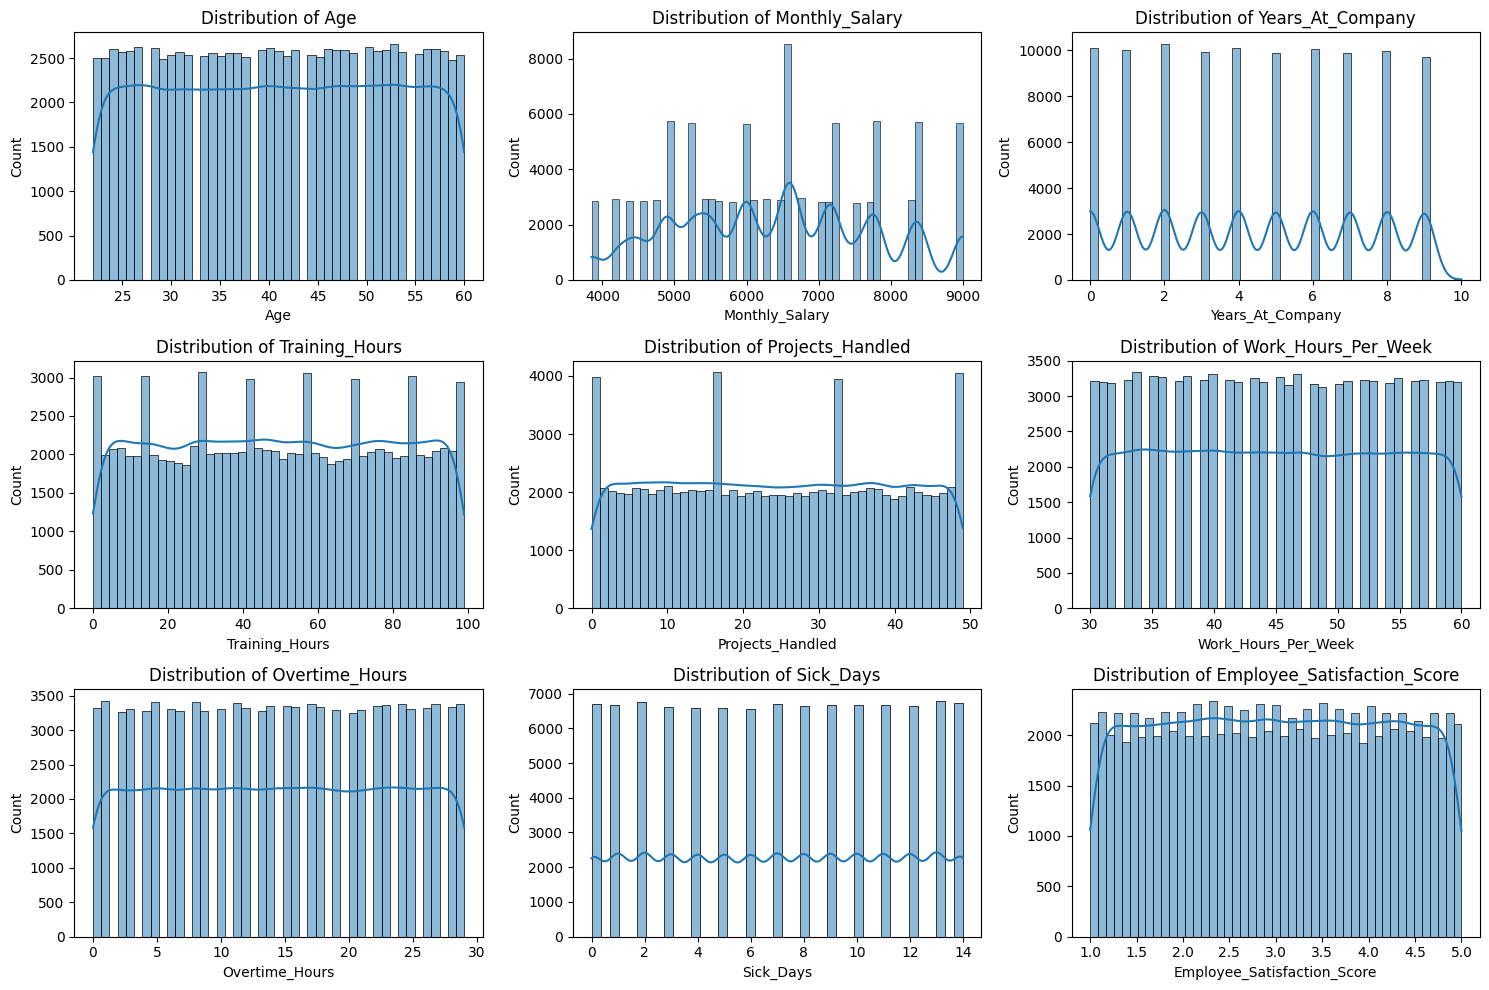

In [11]:
numerical_features = [
    'Age', 'Monthly_Salary', 'Years_At_Company', 'Training_Hours',
    'Projects_Handled', 'Work_Hours_Per_Week', 'Overtime_Hours', 'Sick_Days',
    'Employee_Satisfaction_Score'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

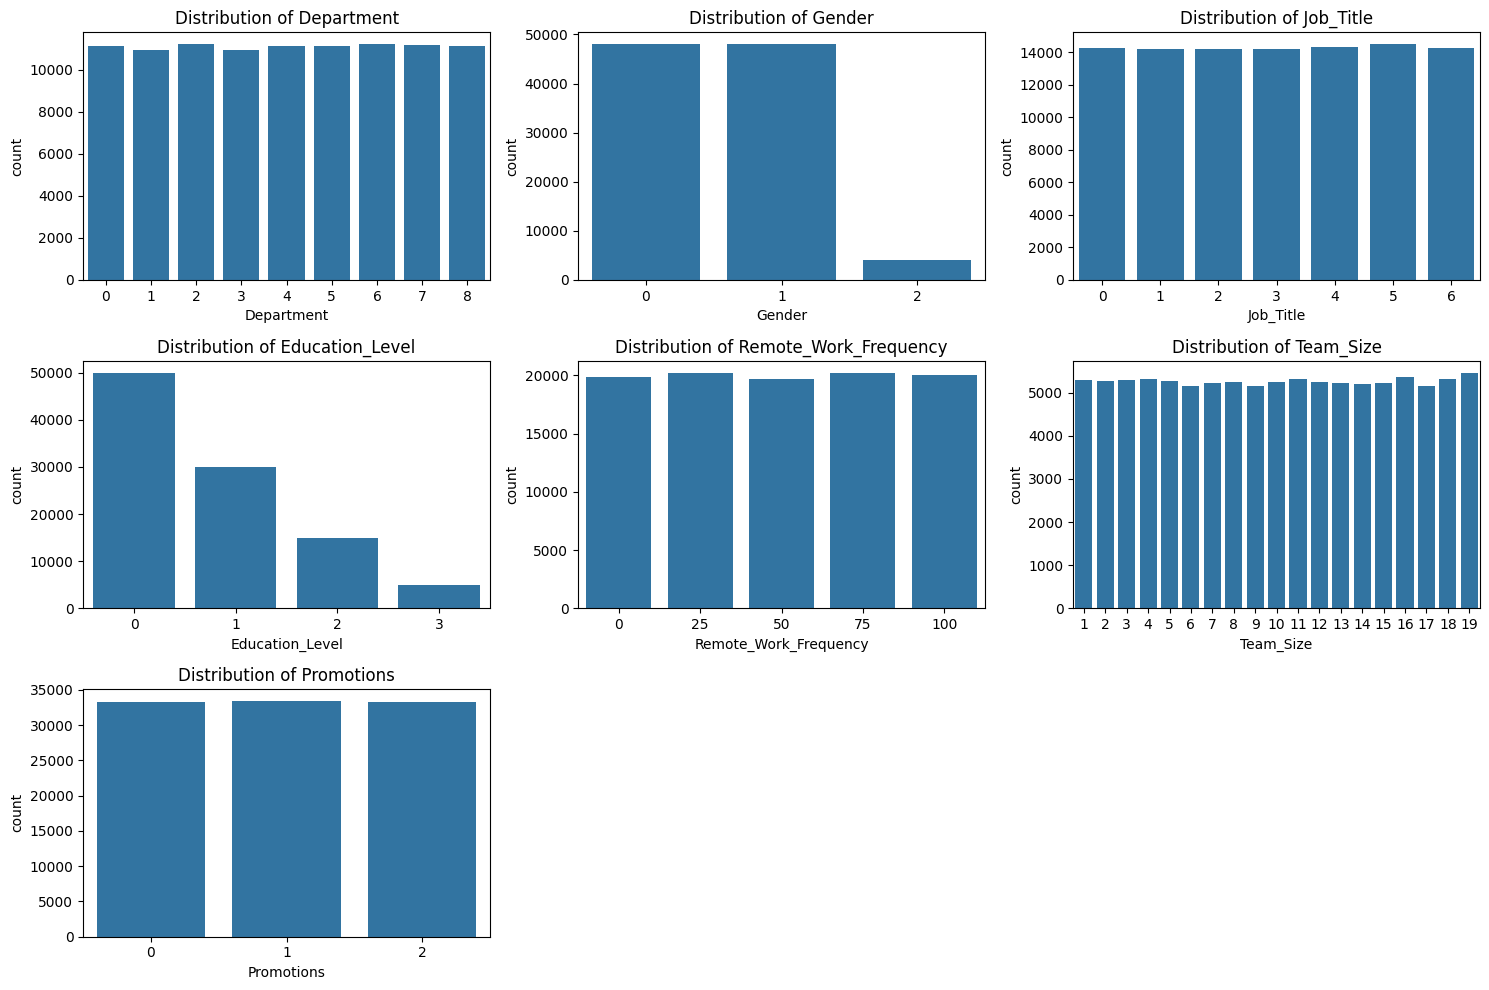

In [12]:
categorical_features = [
    'Department', 'Gender', 'Job_Title', 'Education_Level',
    'Remote_Work_Frequency', 'Team_Size', 'Promotions'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

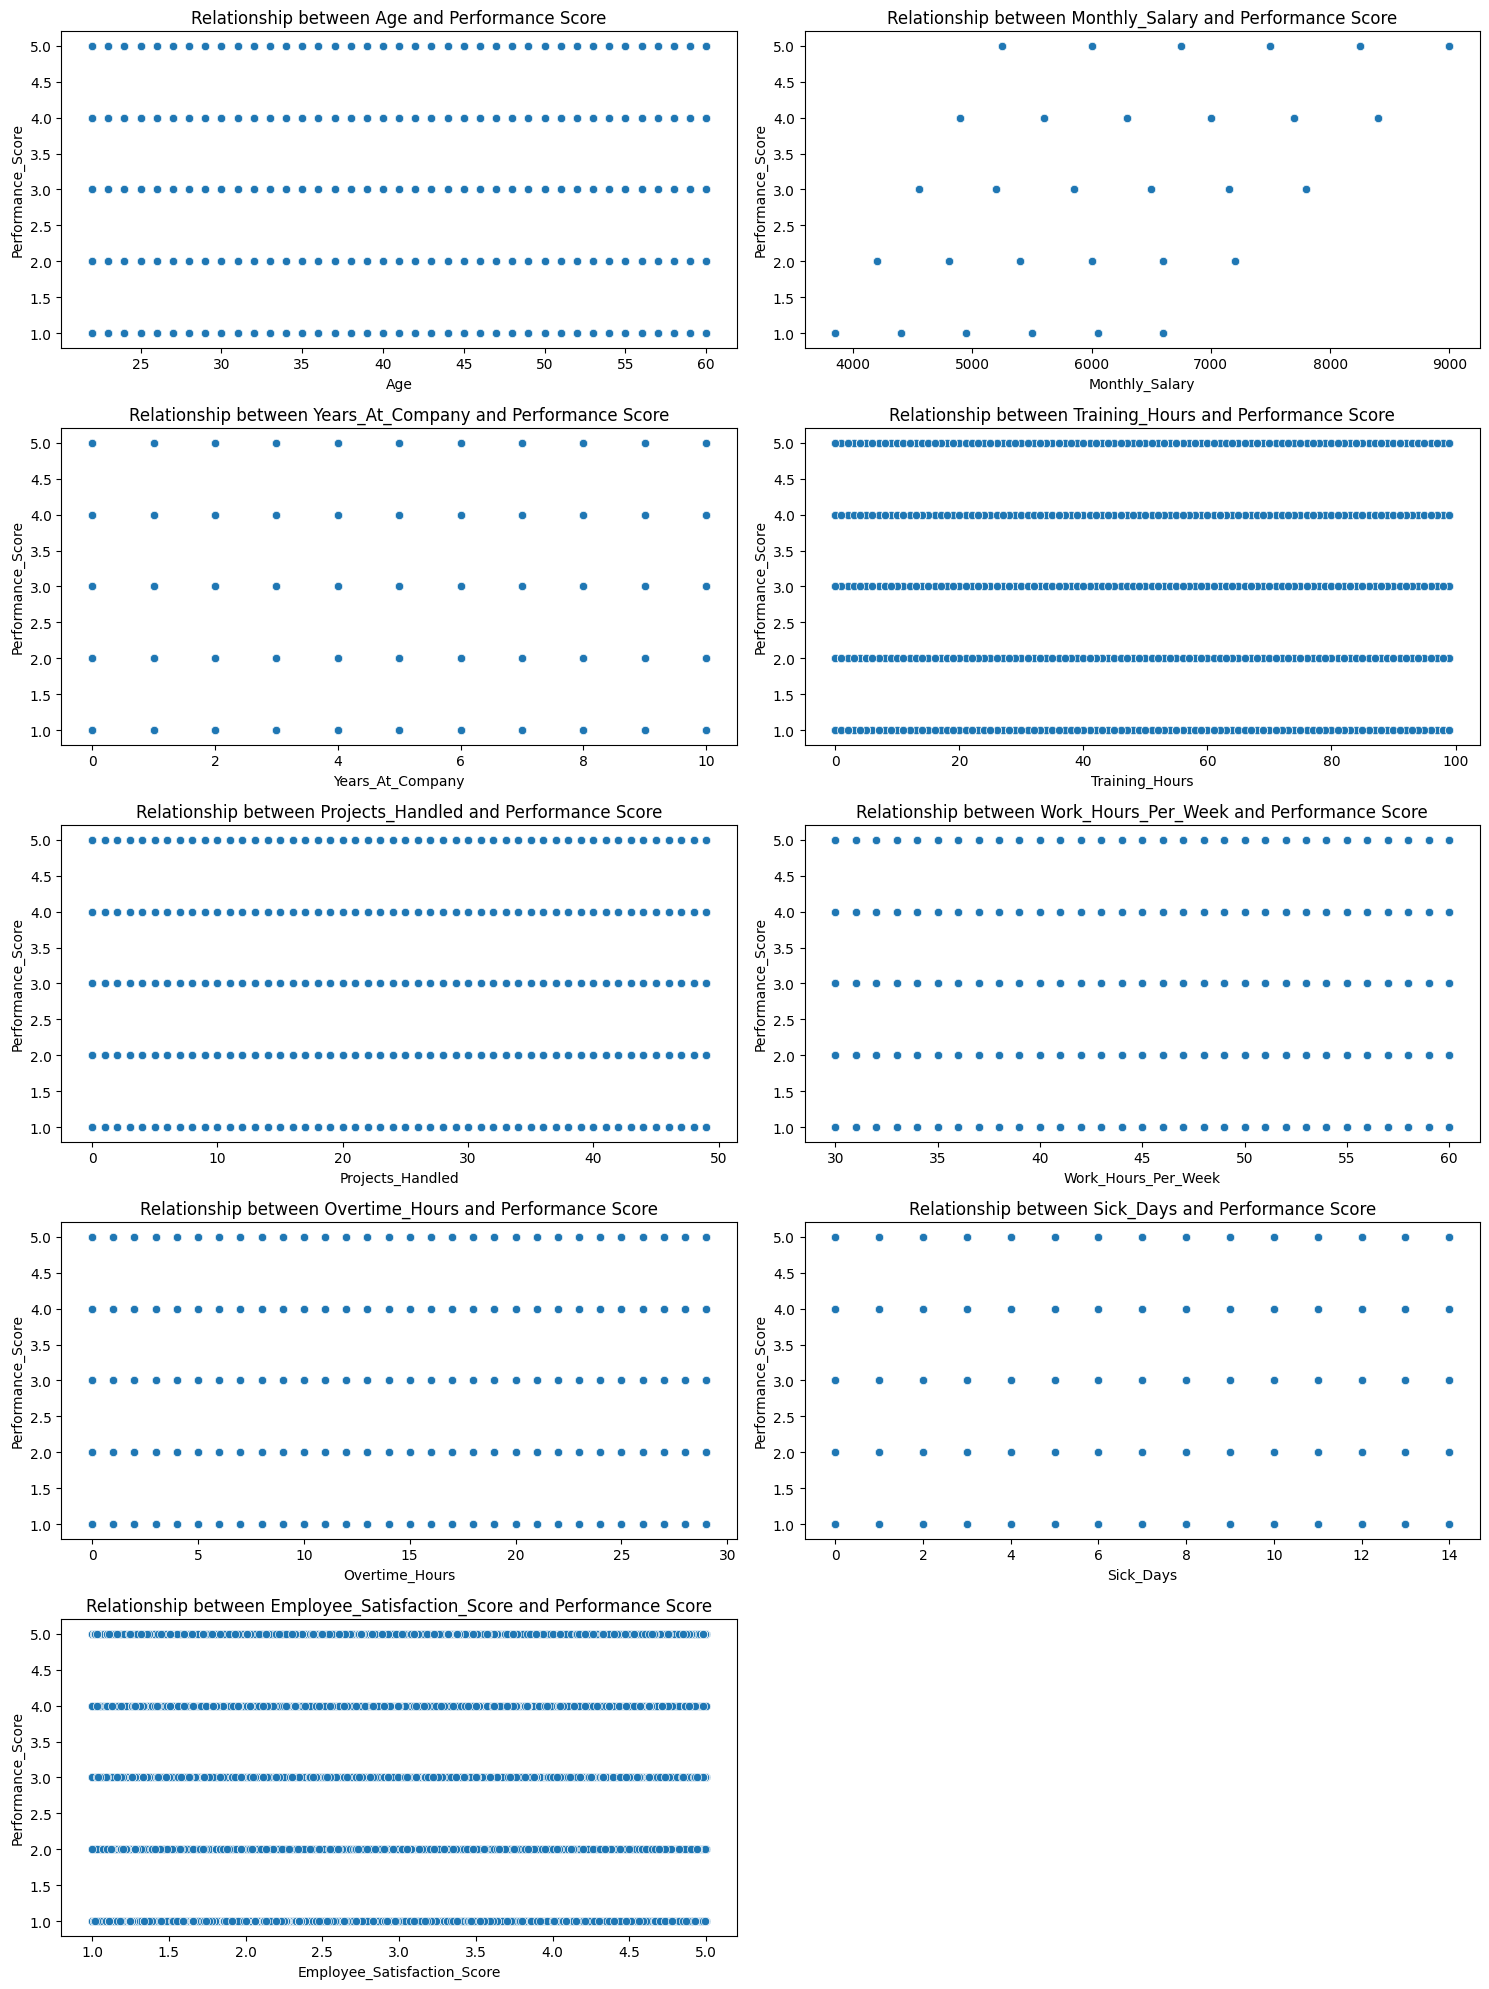

In [13]:
numerical_features = [
    'Age', 'Monthly_Salary', 'Years_At_Company', 'Training_Hours',
    'Projects_Handled', 'Work_Hours_Per_Week', 'Overtime_Hours', 'Sick_Days',
    'Employee_Satisfaction_Score'
]

plt.figure(figsize=(15, 20))
for i, col in enumerate(numerical_features):
    plt.subplot(5, 2, i + 1)
    sns.scatterplot(x=col, y='Performance_Score', data=df)
    plt.title(f'Relationship between {col} and Performance Score')
plt.tight_layout()
plt.show()

**Reasoning**:
Create box plots for categorical features against the target variable to visualize their relationships.



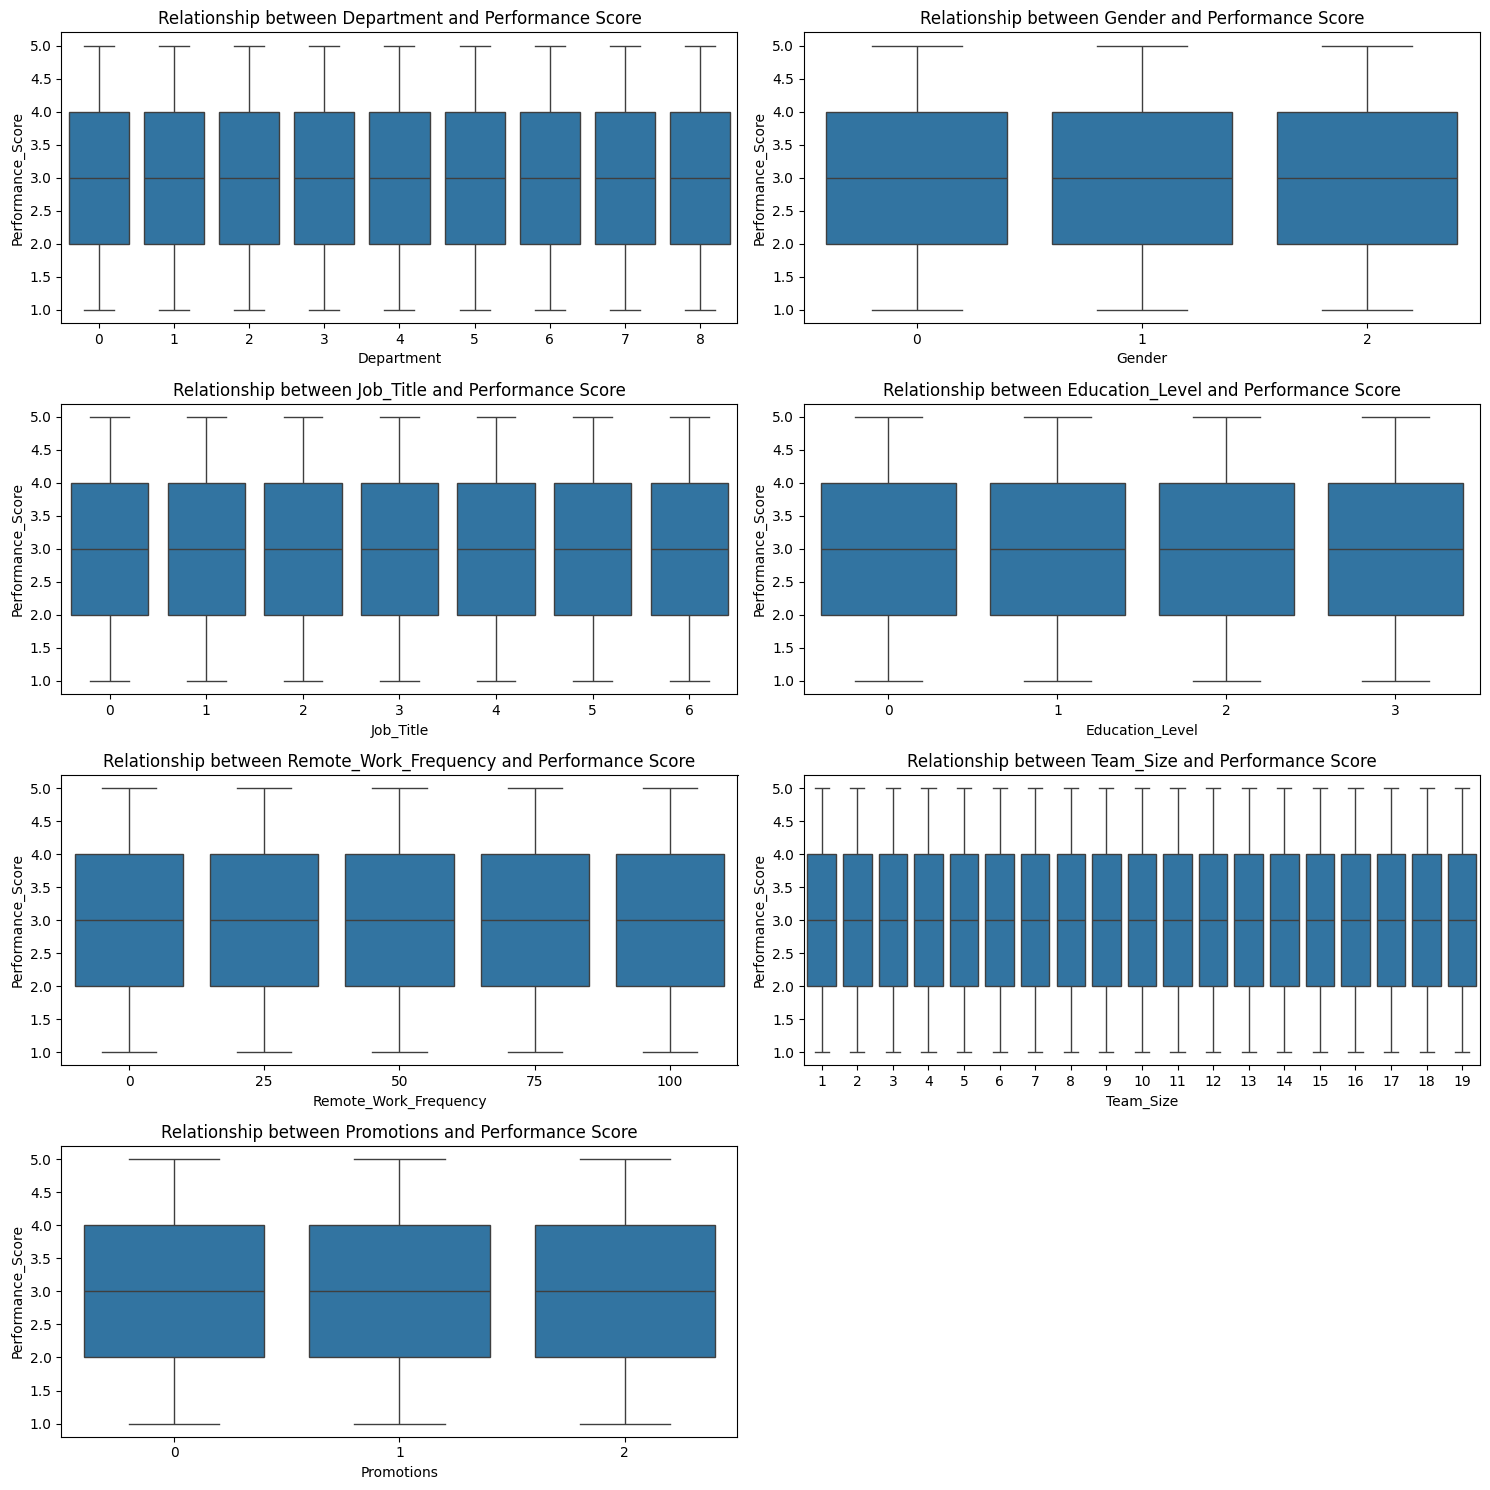

In [14]:
categorical_features = [
    'Department', 'Gender', 'Job_Title', 'Education_Level',
    'Remote_Work_Frequency', 'Team_Size', 'Promotions'
]

plt.figure(figsize=(15, 15))
for i, col in enumerate(categorical_features):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x=col, y='Performance_Score', data=df)
    plt.title(f'Relationship between {col} and Performance Score')
plt.tight_layout()
plt.show()

## Model performance visualization

### Subtask:
Create plots to visualize the performance of the Random Forest model, such as a confusion matrix or ROC curve (if applicable for multi-class).


**Reasoning**:
Generate and display the confusion matrix and calculate the ROC AUC score for the Random Forest model.



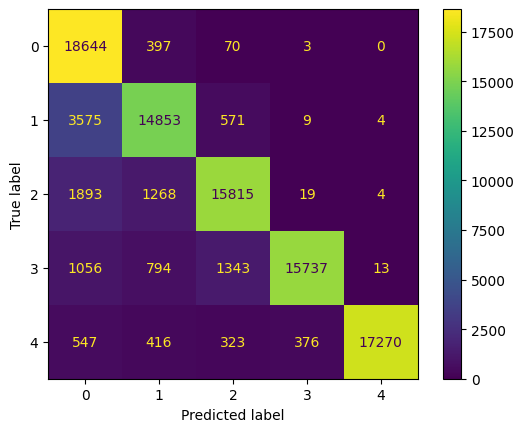

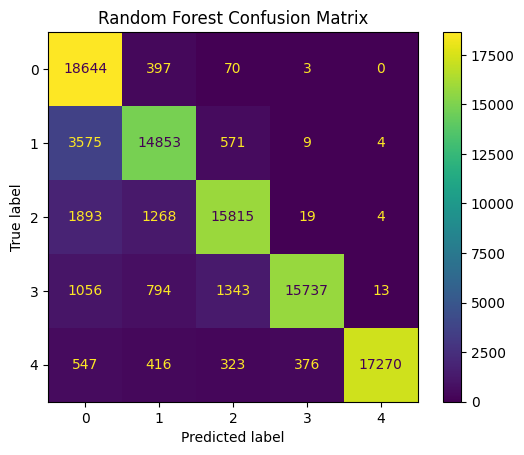


Random Forest ROC AUC (OvR): 0.9840867504070498


In [19]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_test, preds)

# Create confusion matrix display
disp = ConfusionMatrixDisplay.from_predictions(y_test, preds)

# Plot confusion matrix
disp.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

# Calculate ROC AUC score (multi-class)
try:
    roc_auc = roc_auc_score(y_test, proba, multi_class="ovr")
    print("\nRandom Forest ROC AUC (OvR):", roc_auc)
except Exception as e:
    print(f"\nCould not calculate ROC AUC: {e}")

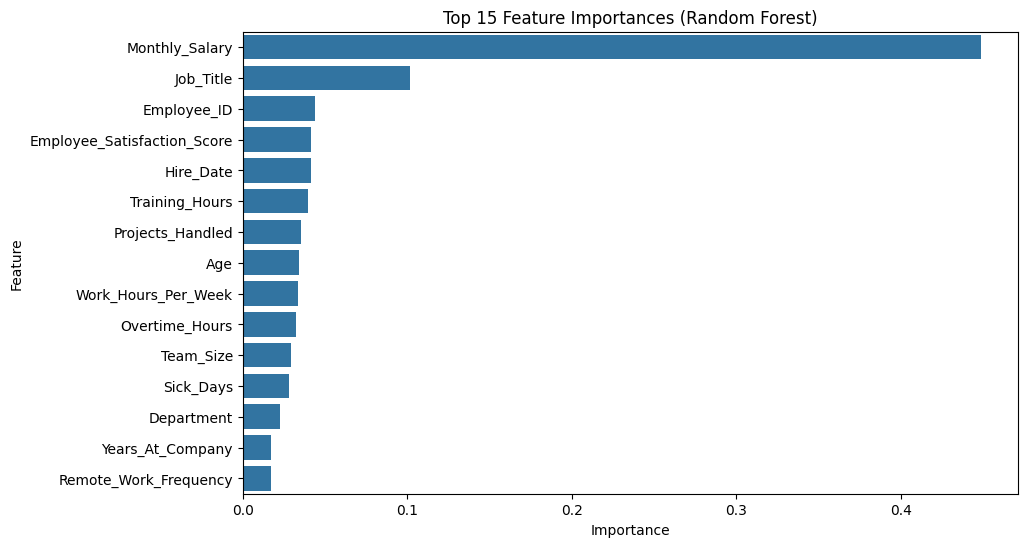

In [17]:
# Access feature importances from the trained Random Forest model
importances = models["Random Forest"].feature_importances_

# Create a DataFrame for feature importance
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot the top 15 feature importances
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(15))
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()